In [4]:
# Data processing
import pandas as pd
import itertools

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

# local python scripts package
from utils import cleanup
from utils import plots
from utils.plots import PlotType

# Logging
import logging
# setup logging level
logging.getLogger().setLevel(logging.DEBUG)

In [5]:
# import dataset
data = pd.read_csv("dataset/king_country_houses_aa.csv")
df = data.copy()
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# initiate a new instance of plots class 
# set color palette and theme for maximum of colors set to columns count
plots = plots.Gryffindor_plots(n_columns=df.shape[1], target_column='price')

In [7]:
descrete_columns = []
descrete_columns.append('view')
descrete_columns.append('bedrooms')
descrete_columns.append('bathrooms')
descrete_columns.append('floors')
descrete_columns.append('zipcode')
descrete_columns.append('yr_built')
descrete_columns.append('yr_renovated')
print(descrete_columns)

['view', 'bedrooms', 'bathrooms', 'floors', 'zipcode', 'yr_built', 'yr_renovated']


In [8]:
continuous_columns = []
continuous_columns.append('price')
continuous_columns.append('sqft_lot')
continuous_columns.append('sqft_lot15')
continuous_columns.append('sqft_above')
continuous_columns.append('sqft_basement')
continuous_columns.append('sqft_living')
continuous_columns.append('lat')
continuous_columns.append('long')
print(continuous_columns)

['price', 'sqft_lot', 'sqft_lot15', 'sqft_above', 'sqft_basement', 'sqft_living', 'lat', 'long']


In [9]:
categorical_columns = []
categorical_columns.append('date') # questionable
categorical_columns.append('id')
categorical_columns.append('waterfront')
categorical_columns.append('grade')
categorical_columns.append('condition')
print(categorical_columns)

['date', 'id', 'waterfront', 'grade', 'condition']


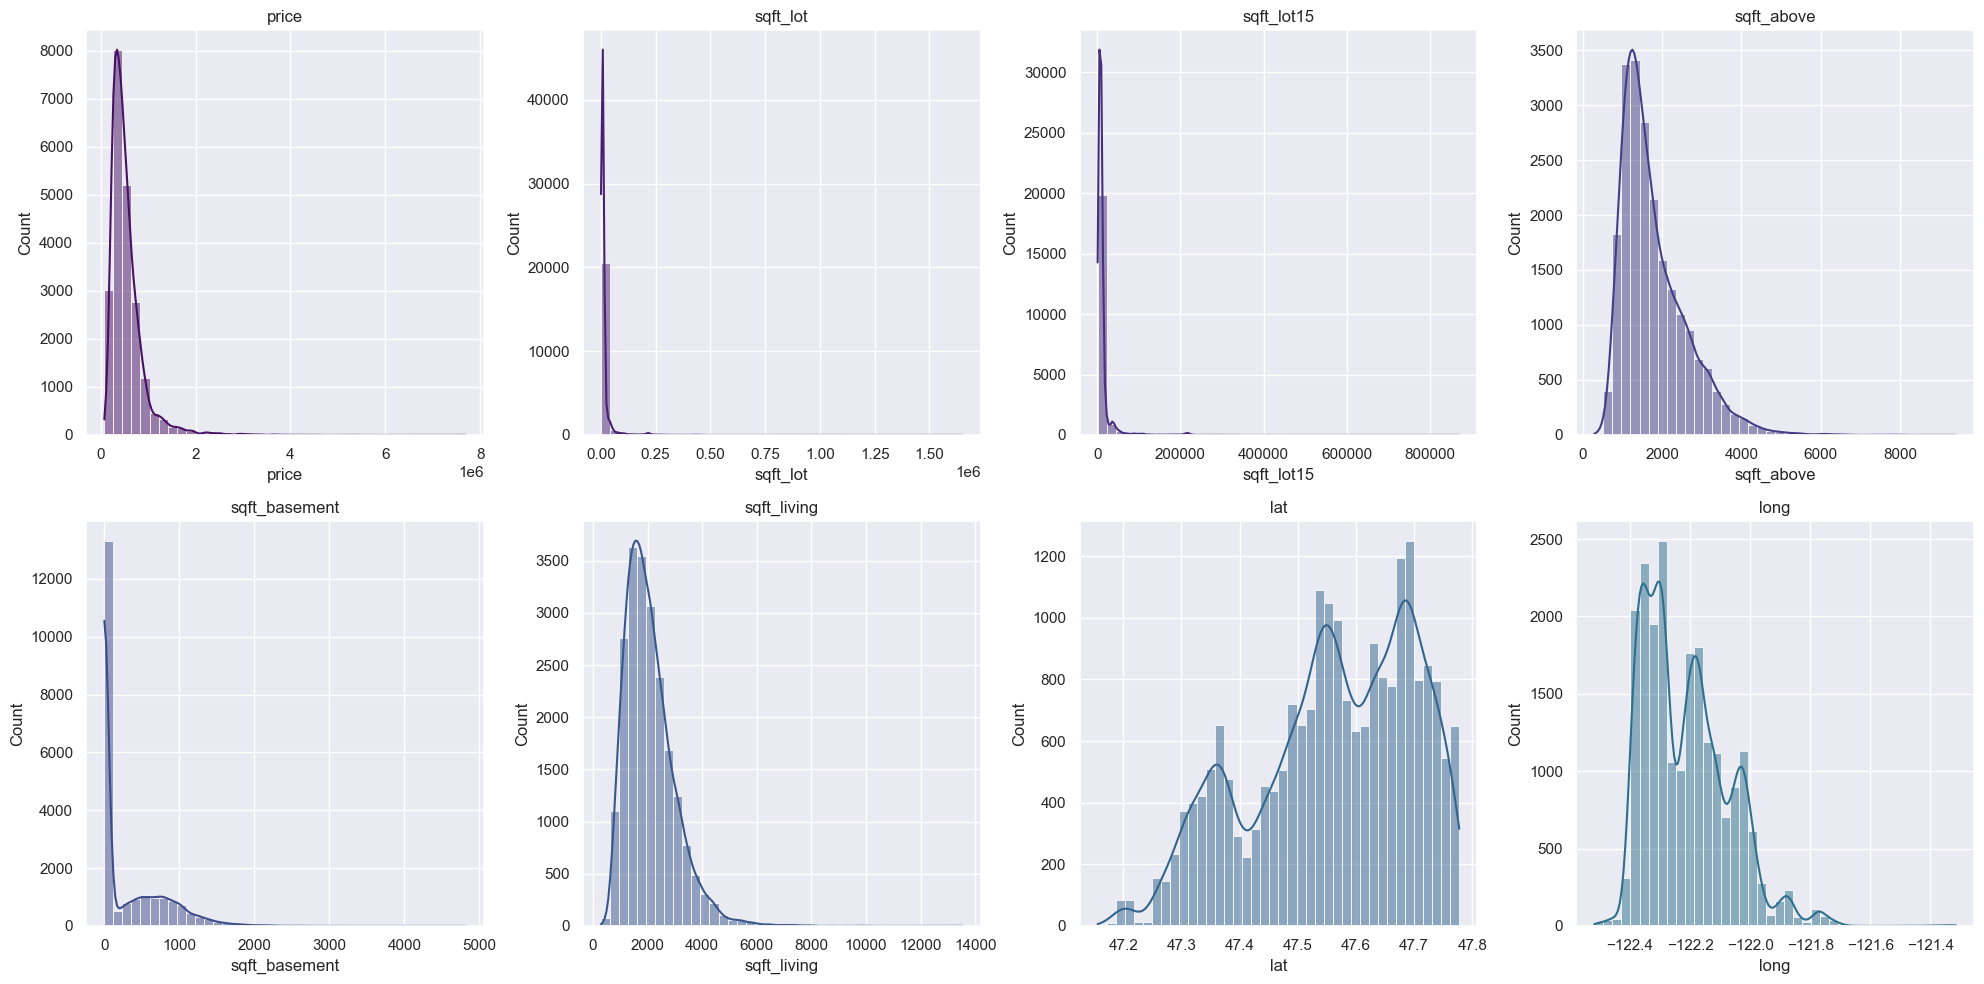

In [10]:
plots.plots_for_columns(df, continuous_columns, PlotType.HISTOGRAM)

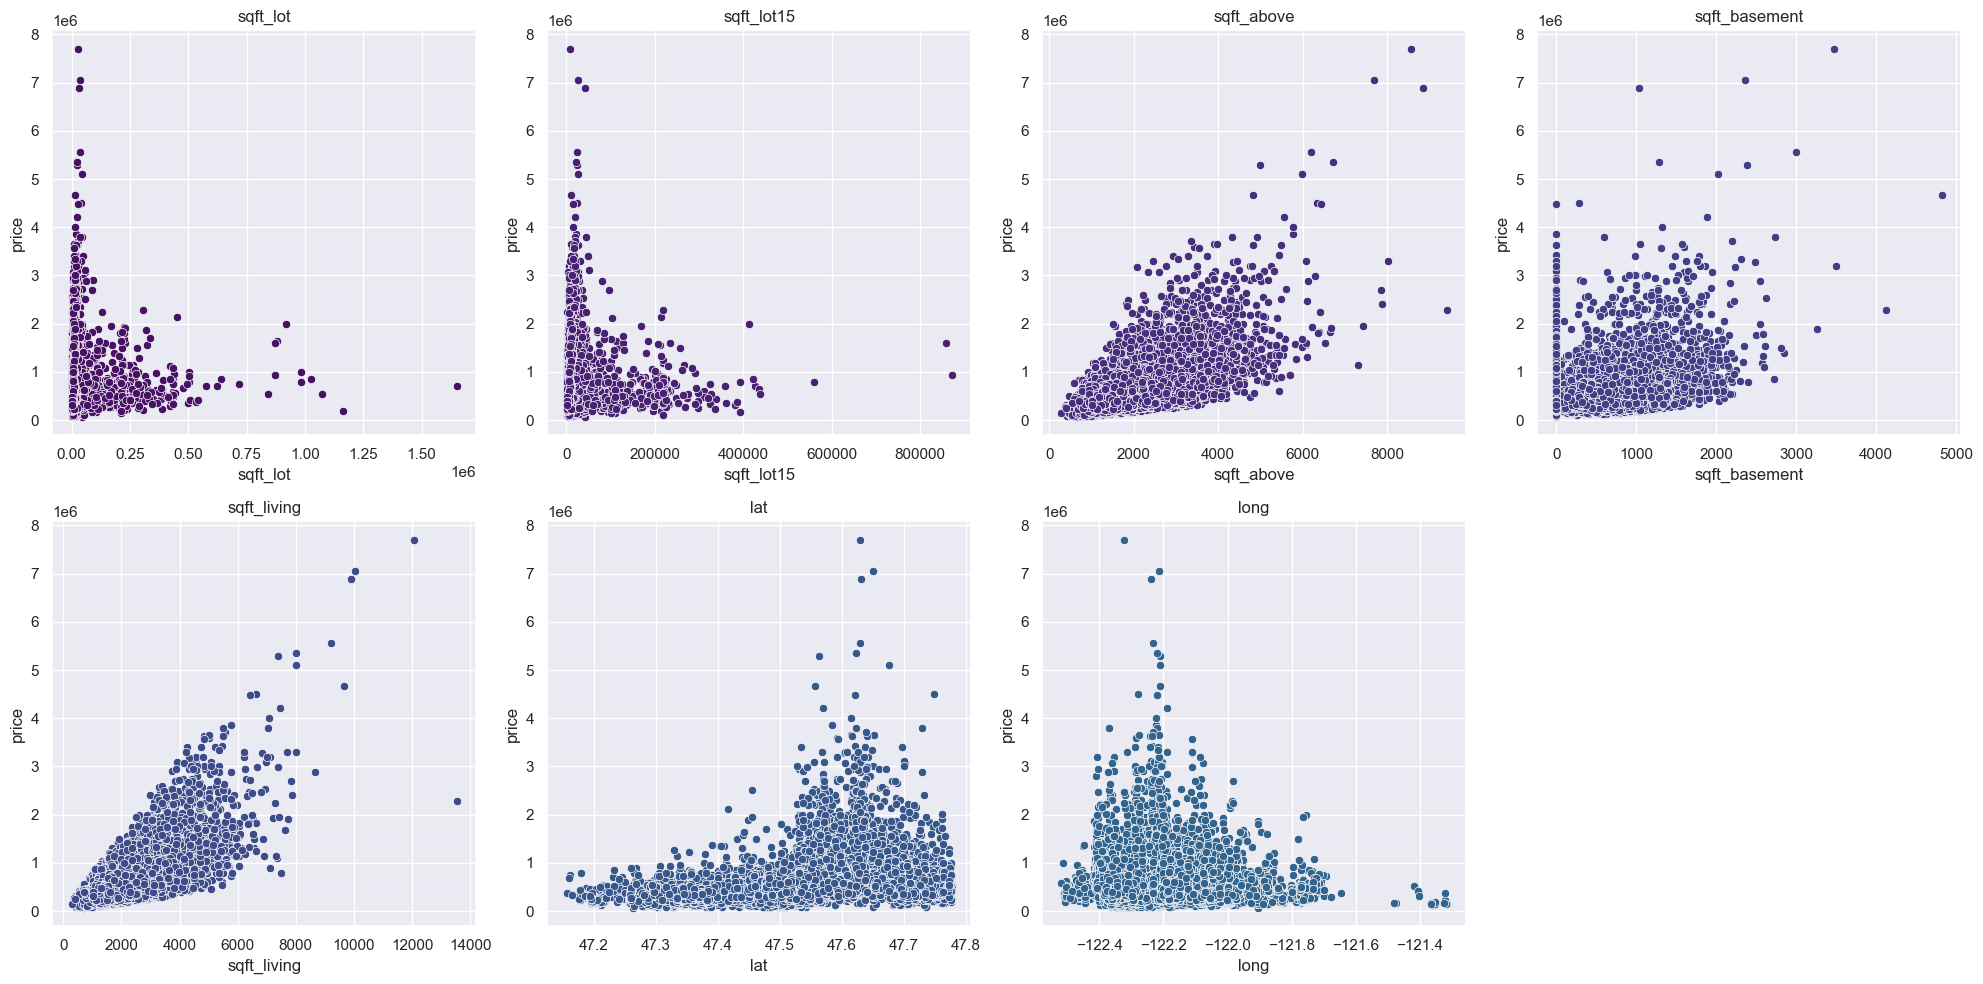

In [11]:
no_price = continuous_columns.copy()
no_price.remove('price')
plots.plots_for_columns(df, no_price, PlotType.SCATTER)

In [12]:
dict_test_results_template = {
    'test_size': '',
    'random_state': '',
    'R2': '',
    'MAE': '',
    'RMSE': '',
    'MSE': '',
}

def linear_regression_test(X, y, test_size, random_state):
    # Test/Train split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    logging.debug(f'100% of our data: {len(df)}.')
    logging.debug(f'70% for training data: {len(X_train)}.')
    logging.debug(f'30% for test data: {len(X_test)}.')

    # Train the model
    model = LinearRegression()
    model.fit(X_train,y_train)

    # Make predictions on the test dataset
    predictions = model.predict(X_test)
    r2_3 = r2_score(y_test, predictions)
    MAE_3 = mean_absolute_error(y_test, predictions)
    RMSE_3 = root_mean_squared_error(y_test, predictions)
    MSE_3 = mean_squared_error(y_test, predictions)

    #Printing the results
    logging.debug(f"R2 = {round(r2_3, 4)}")
    logging.debug(f"MAE = {round(MAE_3, 4)}")
    logging.debug(f"RMSE = {round(RMSE_3, 4)}")
    logging.debug(f"MSE =  {round(MSE_3, 4)}")

    # collecting test results to compare
    dict_test_results = dict_test_results_template.copy()
    dict_test_results['test_size'] = test_size
    dict_test_results['random_state'] = random_state
    dict_test_results['R2'] = r2_3
    dict_test_results['MAE'] = MAE_3
    dict_test_results['RMSE'] = RMSE_3
    dict_test_results['MSE'] = MSE_3

    return dict_test_results


In [13]:
# do not include target column 'price' to continuous column names list
continuous_columns = []
continuous_columns.append('sqft_lot')
continuous_columns.append('sqft_lot15')
continuous_columns.append('sqft_above')
continuous_columns.append('sqft_basement')
continuous_columns.append('sqft_living')
continuous_columns.append('lat')
continuous_columns.append('long')

In [14]:
logging.getLogger().setLevel(logging.INFO)

# Define different subsets of features
feature_subsets = {
    "continuous": continuous_columns,
    "discrete": descrete_columns,
    "all_numeric": continuous_columns + descrete_columns
}

# Define test sizes to experiment with
test_sizes = [0.2, 0.3, 0.4]

# Define different random_state values for variability
random_states = [15, 42, 100]

# Create dictionary to store test results
dict_model_test = {}

# Loop through different feature subsets, test sizes, and random states
for subset_name, feature_list in feature_subsets.items():
    for test_size in test_sizes:
        for random_state in random_states:
            # X/y split
            X = df[feature_list]
            y = df["price"]

            # Run linear regression test
            key = f"LR_{subset_name}_ts{test_size}_rs{random_state}"
            dict_model_test[key] = linear_regression_test(X, y, test_size, random_state)

df_model_test = pd.DataFrame(dict_model_test).T

# Apply formatting to ensure all values are displayed with 4 decimal places
columns_to_format = ['R2', 'MAE', 'RMSE', 'MSE']
df_model_test[columns_to_format] = df_model_test[columns_to_format].map(lambda x: f"{x:.4f}")

df_model_test.sort_values('R2', ascending=False, inplace=True)

df_model_test

,test_size,random_state,R2,MAE,RMSE,MSE
LR_all_numeric_ts0.2_rs100,0.2,100.0,0.6636,136038.5223,212925.0569,45337079849.4771
LR_all_numeric_ts0.3_rs100,0.3,100.0,0.6597,135768.4976,214809.9256,46143304149.7701
LR_all_numeric_ts0.3_rs15,0.3,15.0,0.6519,136326.0698,217198.4185,47175153011.9992
LR_all_numeric_ts0.2_rs15,0.2,15.0,0.6515,136394.9196,211653.3662,44797147423.3597
LR_all_numeric_ts0.4_rs100,0.4,100.0,0.6513,136584.4359,215496.5313,46438755015.4479
LR_all_numeric_ts0.4_rs15,0.4,15.0,0.6512,136521.6195,223104.6036,49775664154.5832
LR_all_numeric_ts0.2_rs42,0.2,42.0,0.6458,139813.6342,231406.4618,53548950584.2303
LR_all_numeric_ts0.4_rs42,0.4,42.0,0.6443,137706.0984,230598.0826,53175475713.5311
LR_all_numeric_ts0.3_rs42,0.3,42.0,0.6426,139592.2235,227140.5118,51592812078.8215
LR_continuous_ts0.2_rs100,0.2,100.0,0.5996,150042.4625,232309.1870,53967558360.7550


# 📊 Understanding High Error Values in Linear Regression Results

## 🔍 Why Are the Errors So High?

### 1️⃣ Large Scale of the Target Variable (`price`)
- If `price` values are **large** (e.g., in the hundreds of thousands), the errors will also be large.
- This is common when predicting monetary values since even small relative errors result in high absolute values.
- **🔹 Possible Solution:** Normalize/standardize `price` or use **relative error metrics** like Mean Absolute Percentage Error (MAPE).

### 2️⃣ Linear Regression Assumes a Linear Relationship
- If the relationship between features (`X`) and `price` is **non-linear**, Linear Regression **won't perform well**.
- **🔹 Possible Solution:** Check scatterplots to see if relationships are linear. If not, consider using **Polynomial Regression** or **Tree-Based Models**.

### 3️⃣ Omitted Important Features (Feature Selection)
- Linear regression relies on the features provided.
- If key features (like **location, condition, brand**) are missing, the model lacks critical information.
- **🔹 Possible Solution:** Include more relevant features and encode categorical variables using **one-hot encoding** or **ordinal encoding**.

### 4️⃣ Outliers in the Dataset
- Extreme values in `price` can **skew** the model's predictions.
- **🔹 Possible Solution:** Detect outliers using box plots or `df.describe()`. Consider **removing or transforming** them.

### 5️⃣ Multicollinearity Between Features
- If features are **highly correlated**, the model's coefficients become unstable.
- **🔹 Possible Solution:** Check correlation with `df.corr()`. Remove redundant features if necessary.

---

## 📌 Conclusions About Linear Regression

### ✅ Is Linear Regression a Good Choice for Predicting `price`?
- **If R² is low (~0.4-0.6) and errors are high**, Linear Regression **may not be the best model**.
- It performs better when:
  - The dataset contains **linear** relationships.
  - Important variables are included.
  - Outliers and skewed data are handled properly.

### ✅ Which Parameters Work Best?
- **Feature Subset:**
  - `all_numeric` subset has the highest **R² (~0.65)** → meaning more features improve the model.

- **Test Size (`test_size`):**
  - **Smaller test sizes (0.2) tend to give higher R² (~0.66)** than larger ones (0.4, ~0.64).
  - **More training data improves the model.**
  - **🔹 Recommendation:** Use **test_size = 0.2** for training.

- **Random State (`random_state`):**
  - Has a **small impact (~0.02 variance in R²)**.
  - The dataset is large enough that different train/test splits **don’t drastically affect performance**.
  - **🔹 Recommendation:** Any fixed `random_state` (e.g., `42`) is fine for consistency.

---

## 🔮 Final Thoughts
- Linear Regression may **not be the best choice** if relationships are **non-linear** or features are missing.
- If using Linear Regression, **feature engineering, log transformations, and handling multicollinearity** can improve performance.
- Testing **alternative models** (such as **Polynomial Regression, Decision Trees, or Random Forests**) may yield **better results**.

---
